## Exploratory Analysis for Jewelry_Type = 'Rings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


#Create label for price
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#used for expanding the no o viible columns of dataframe


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


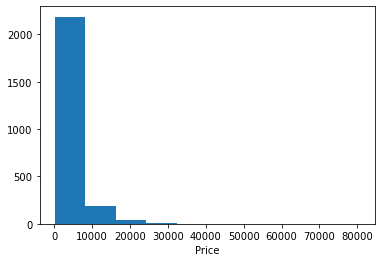

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

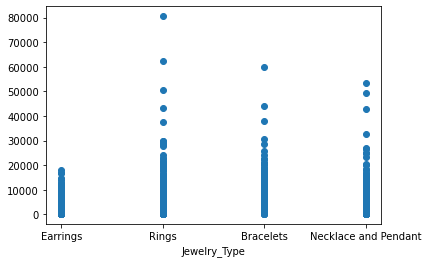

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone3_Desc', 'Stone3_Carat', 'Stone3_Stone', 'Stone3_Color','Stone3_Cut',                               
                                  'Stone4_Desc', 'Stone4_Carat', 'Stone4_Stone', 'Stone4_Color','Stone4_Cut',
                                  'Stone5_Desc','Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
                                  'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color','Stone6_Cut'])

In [10]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [11]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

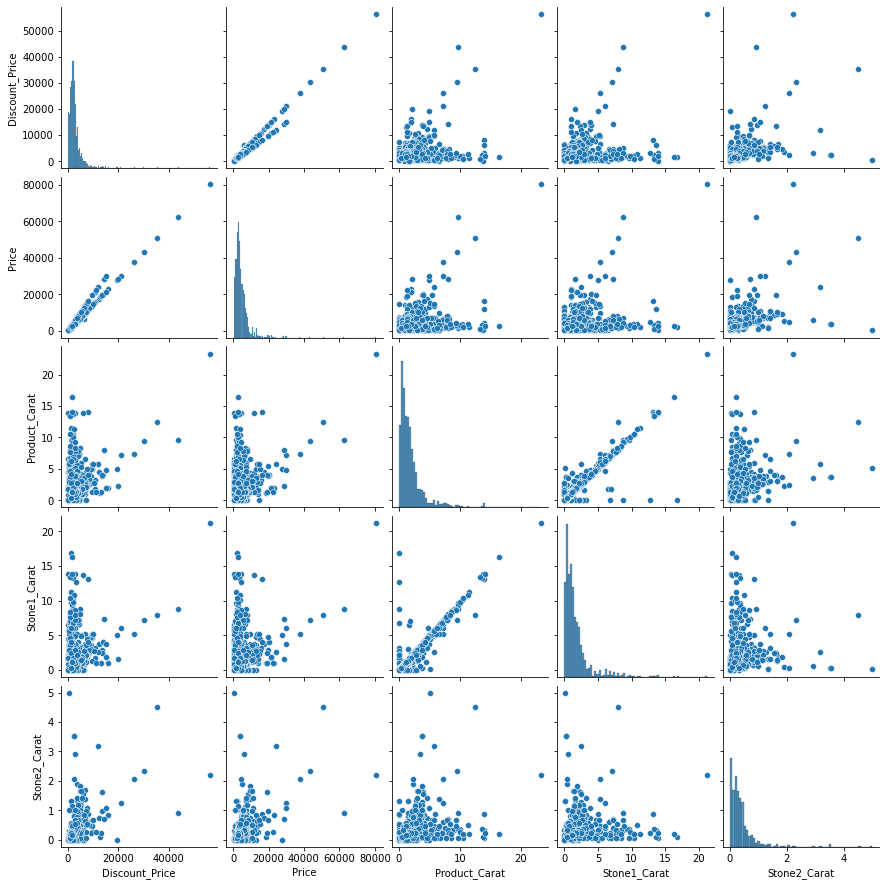

In [12]:
sns.pairplot(df_rings)
plt.show()

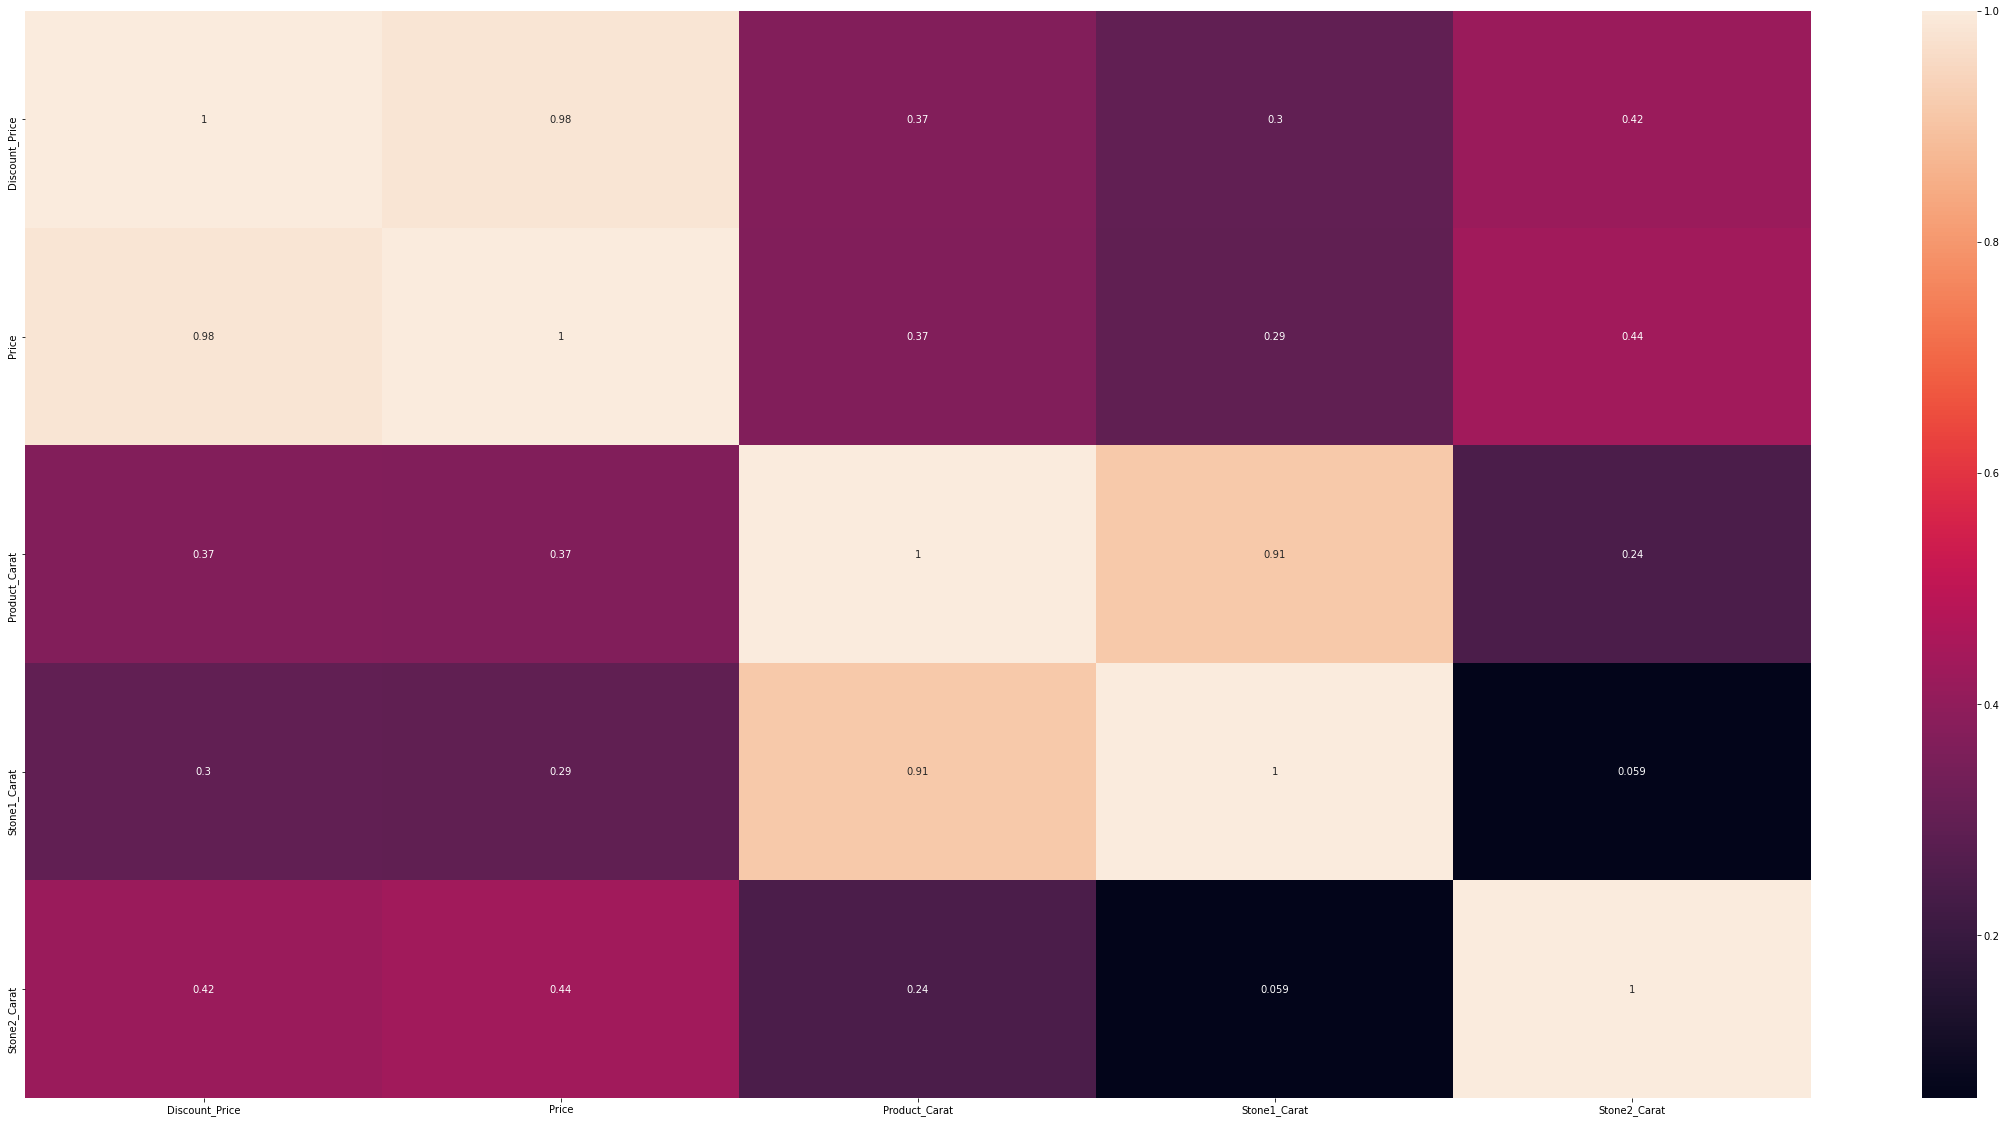

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [14]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [15]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

In [16]:
idx = df_rings[df_rings['Metal'] =='Stainless Steel & 18K Gold'].index
df_rings.drop(idx,inplace=True)

In [17]:
#df_rings[df_rings['Metal Color'] == '']
df_rings.loc[(df_rings['Stone1_Stone'] == 'Alexandrite') & 
             (df_rings['Stone1_Color'].str.isspace()),
            'Stone1_Color'] = 'Bluish-Green'

In [18]:
df_rings['Stone1_Stone'] = df_rings['Stone1_Stone'].str.replace('Lazuli','Lapis-Lazuli')

In [19]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Amethyst')]

In [20]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Greenish-Blue'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Aquamarine')]

In [21]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Yellow'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Citrine')]

In [22]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond')]

In [23]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald') & 
             (df_rings['Stone1_Color'].str.isspace()), 
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Emerald')]

In [24]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Garnet')]

In [25]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Jade')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Lapis-Lazuli')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Malachite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Pink'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Morganite')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Color'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Color')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Multi-Sapphire'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Black'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Onyx')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Opal')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'White'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Smokey'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Sapphire')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Tanzanite')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Topaz')]


df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise') & 
             (df_rings['Stone1_Color'].str.isspace()),
             'Stone1_Color'] = 'Turquoise'

#df_rings.loc[(df_rings['Stone1_Stone'] == 'Turquoise')]


In [26]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey')]

,Description,Discount_Price,Price,Metal,Metal Color,Stones,Jewelry_Type,Product_Carat,Stone1_Desc,Stone1_Carat,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Desc,Stone2_Carat,Stone2_Stone,Stone2_Color,Stone2_Cut
1285,"Effy Mosaic Sterling Silver Multi Gemstone Ring, 1.66 TCW",157.5,225.0,Sterling Silver,Sterling Silver,"Smokey Quartz, Peridot, Garnet, Citrine, Amethyst, Blue Topaz and Garnet",Rings,1.66,Smokey Quartz,0.0,Quartz,Smokey,Smokey,Peridot,0.0,Peridot,,


In [27]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Quartz') &
            (df_rings['Stone1_Cut'] == 'Smokey'), 'Stone1_Cut'] = 'Oval'

In [28]:
df_rings.loc[(df_rings['Stone1_Stone'] == 'Diamond') &
            (df_rings['Stone1_Cut'].str.isspace()), 'Stone1_Cut'] = 'Round'

In [29]:
df_rings.drop(df_rings[df_rings['Stone1_Stone']== ' '].index,inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Band'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Stone'] == 'Bands'].index, inplace=True)

df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0M486DTR'].index, inplace=True)
df_rings.drop(df_rings[df_rings['Stone2_Desc'] == 'Matching band for Style WZ0P637D26'].index, inplace=True)



In [30]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'White'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Diamond')]

In [31]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald') & 
             (df_rings['Stone2_Color'].str.isspace()), 
             'Stone2_Color'] = 'Green'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Emerald')]

In [32]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Garnet')]

In [33]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Multi-Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Multi-Sapphire'
#df_rings.loc[(df_rings['Stone1_Stone'] == 'Multi-Sapphire')]

In [34]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Red'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Ruby')]

df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Blue'

#df_rings.loc[(df_rings['Stone2_Stone'] == 'Sapphire')]


In [35]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

df_rings.loc[(df_rings['Stone2_Stone'] == 'Peridot') & 
             (df_rings['Stone2_Cut'].str.isspace()),
             'Stone2_Cut'] = 'Oval'

In [36]:
df_rings.loc[(df_rings['Stone2_Stone'] == 'Tsavorite') & 
             (df_rings['Stone2_Color'].str.isspace()),
             'Stone2_Color'] = 'Green'

In [37]:
df_rings[['Stones','Product_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
             (df_rings['Stone2_Carat'] == 0)]

,Stones,Product_Carat
425,"Round Diamond, Round Black Diamond , Round Cognac Diamond",1.47
619,"Round Cognac Diamond, Round Diamond ,",0.46
623,"Round Diamond, Round Black Diamond , Round Cognac Diamond ,",0.72
626,"Round Diamond, Round Black Diamond , Round Emerald 0.05,",1.40
631,"Round Diamond, Round Cognac Diamond , Round Emerald 0.19",2.89
635,"Round Cognac Diamond, Round Diamond ,",0.89
636,"Round Diamond, Round Cognac Diamond , Round Emerald 0.02,",0.66
637,"Round Diamond, Round Cognac Diamond , Round Emerald 0.06,",1.35
648,"Round Diamond, Round Black Diamond ,",1.28
674,"Round Black Diamond, Round Diamond ,",1.64


In [38]:
#df_rings[['Stones','Product_Carat','Stone1_Carat','Stone2_Carat']].loc[(df_rings['Stone1_Carat'] == 0) & 
 #            (df_rings['Stone2_Carat'] == 0), ['Stone1_Carat','Stone2_Carat'] = df_rings['Product_Carat']/2


for index, row in df_rings.iterrows():
    if (row['Stone1_Carat'] == 0 ) & (row['Stone2_Carat'] == 0):
        c = row['Product_Carat'] / 2 
        #print('Divided c: ', c )
        
        df_rings.at[index, 'Stone1_Carat'] = c
        df_rings.at[index, 'Stone2_Carat'] = c
        #print()
 
                                                                       
                                                                       

In [39]:
#Droping rows with 'Pearl' as Stone1 as Stone1_Carat is 0
#df_rings.drop(df_rings.loc[(df_rings['Stone1_Stone'] == 'Pearl')], axis=0)
df_rings.drop(df_rings[df_rings['Stone1_Stone'] == 'Pearl'].index, inplace=True)

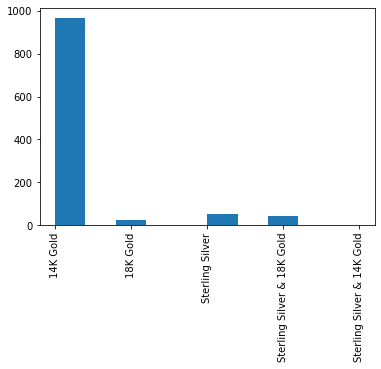

In [40]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

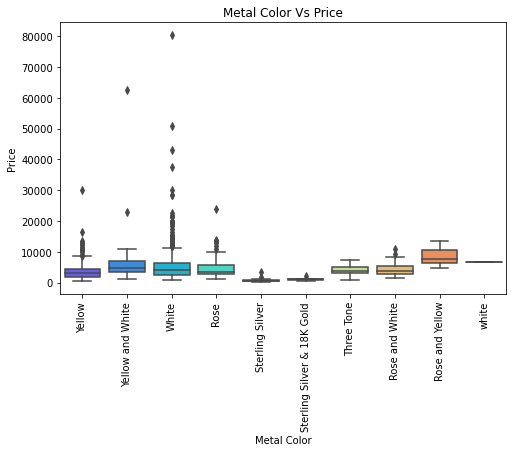

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

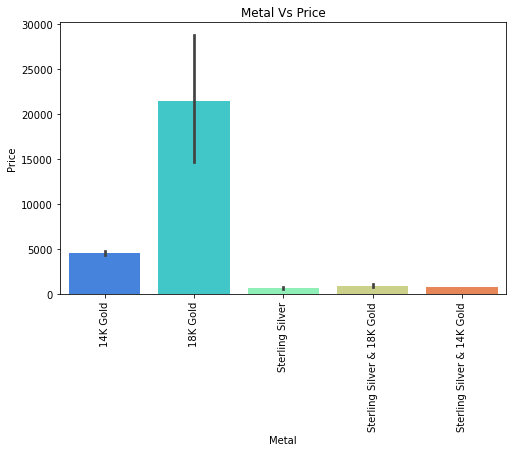

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

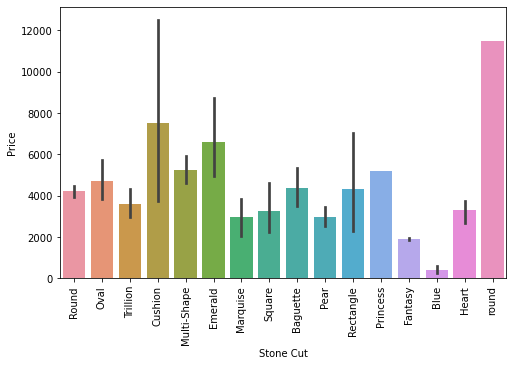

In [43]:
sns.color_palette("flare", as_cmap=True)
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings)
plt.xlabel('Stone Cut')
#plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

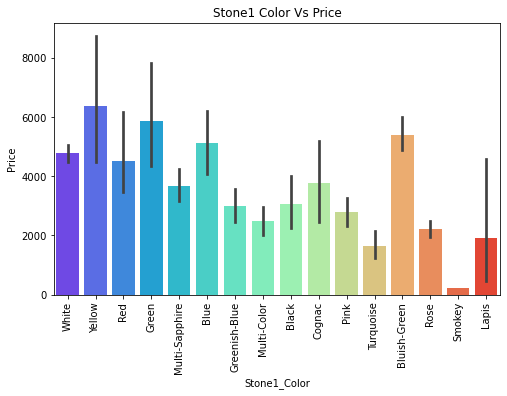

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

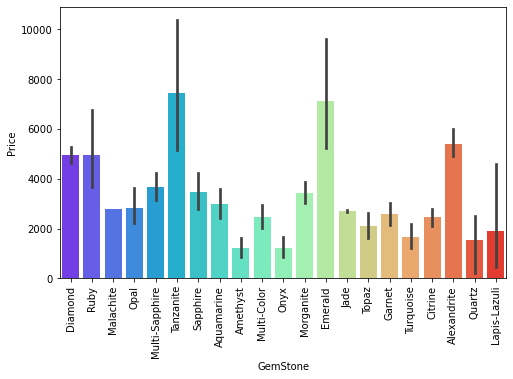

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
#plt.title("Stone1 Vs Price")
plt.xlabel('GemStone')
plt.xticks(rotation=90)
plt.show()

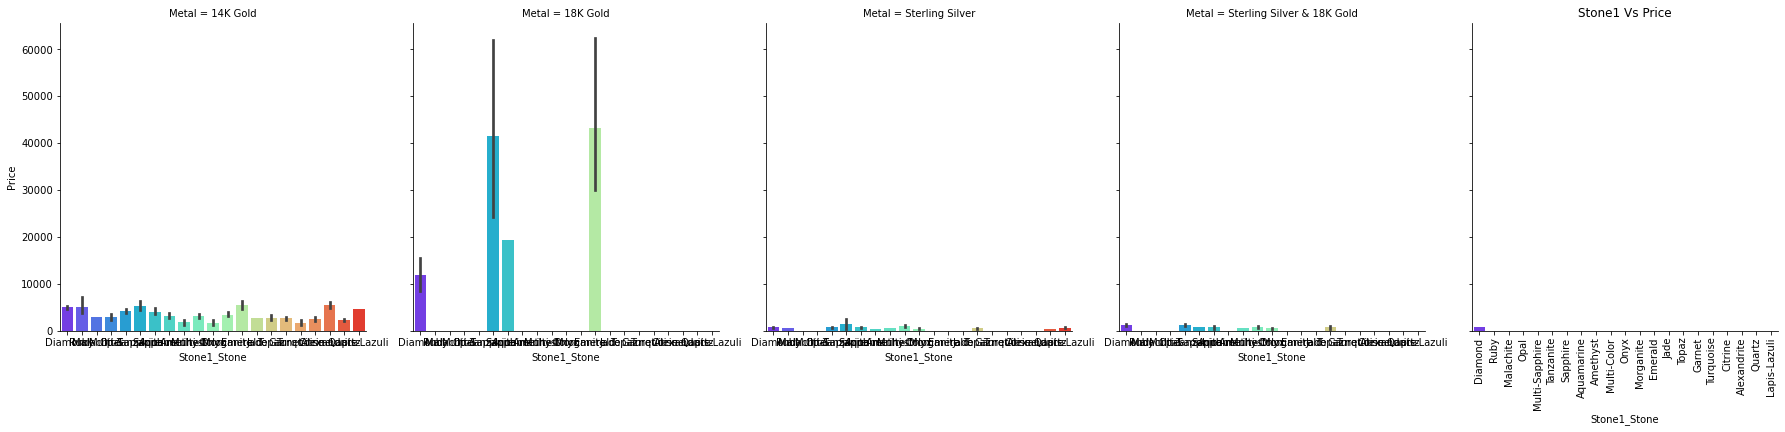

In [46]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

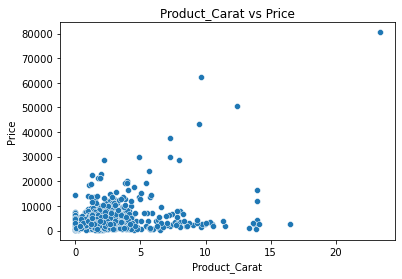

In [47]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

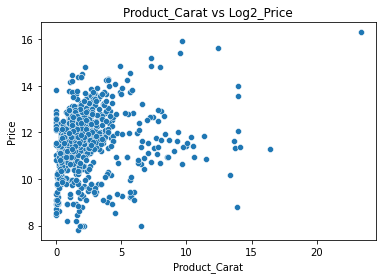

In [48]:
sns.scatterplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

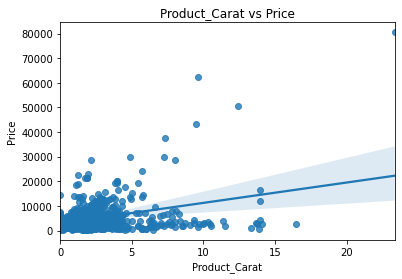

In [49]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

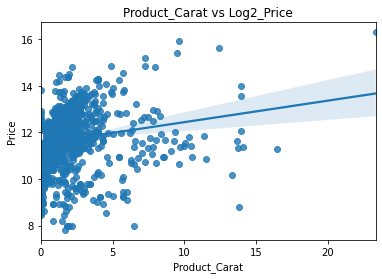

In [50]:
sns.regplot(x='Product_Carat', y=np.log2(df_rings['Price']),data=df_rings)
_ = plt.title('Product_Carat vs Log2_Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

## Pre-processing & Training Data Development

In [51]:
df_rings.columns

Index(['Description', 'Discount_Price', 'Price', 'Metal', 'Metal Color',
       'Stones', 'Jewelry_Type', 'Product_Carat', 'Stone1_Desc',
       'Stone1_Carat', 'Stone1_Stone', 'Stone1_Color', 'Stone1_Cut',
       'Stone2_Desc', 'Stone2_Carat', 'Stone2_Stone', 'Stone2_Color',
       'Stone2_Cut'],
      dtype='object')

In [52]:
df_rings.isnull().sum()

Description         0
Discount_Price      0
Price               0
Metal               0
Metal Color         0
Stones              0
Jewelry_Type        0
Product_Carat       0
Stone1_Desc         0
Stone1_Carat        0
Stone1_Stone        0
Stone1_Color        0
Stone1_Cut          0
Stone2_Desc       519
Stone2_Carat      519
Stone2_Stone      519
Stone2_Color      519
Stone2_Cut        519
dtype: int64

In [53]:
df_rings['Stone2_Carat'].fillna(0, inplace=True)

In [54]:
#Check distribution of Stone1
df_rings['Stone1_Stone'].value_counts()

Diamond           554
Sapphire           77
Tanzanite          76
Emerald            68
Multi-Sapphire     61
Ruby               52
Multi-Color        36
Topaz              27
Morganite          24
Aquamarine         20
Amethyst           17
Onyx               16
Opal               15
Garnet             12
Citrine            11
Turquoise           8
Alexandrite         5
Lapis-Lazuli        3
Quartz              3
Jade                2
Malachite           1
Name: Stone1_Stone, dtype: int64

In [55]:
#For diamonds what is the type of stone cut
df_rings[['Stone1_Cut']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Cut 
Round          478
Multi-Shape     65
Baguette         5
Cushion          4
round            1
Pear             1
dtype: int64

In [56]:
#For diamonds what is the type of stone color
df_rings[['Stone1_Color']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

Stone1_Color
White           501
Yellow           20
Black            18
Cognac           12
Blue              3
dtype: int64

In [57]:
#For diamonds what is the type of stone carat
#df_rings[['Stone1_Carat']][df_rings['Stone1_Stone'] == 'Diamond'].value_counts()

In [58]:
#Check distribution of Stone2
df_rings['Stone2_Stone'].value_counts()

Diamond           514
Emerald            21
Tsavorite          10
Sapphire            9
Multi-Sapphire      3
Ruby                3
Width;              2
Topaz               2
Garnet              2
Peridot             2
Amethyst            1
Name: Stone2_Stone, dtype: int64

In [59]:
#For diamonds what is the type of stone cut
df_rings[['Stone2_Cut']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Cut 
Round          477
Multi-Shape     35
oval             1
Baguette         1
dtype: int64

In [60]:
#For diamonds what is the type of stone color
df_rings[['Stone2_Color']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

Stone2_Color
White           497
Cognac            9
Black             7
Blue              1
dtype: int64

In [61]:
#For diamonds what is the type of stone carat
#df_rings[['Stone2_Carat']][df_rings['Stone2_Stone'] == 'Diamond'].value_counts()

In [62]:
writer = pd.ExcelWriter('/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/All_EDA_Rings.xlsx')

#Write Rings Data 
df_rings.to_excel(writer, 'Rings_data')
writer.save()

In [63]:
#Group by Stone1, Price Columns 

gscp = df_rings[['Stone1_Stone', 'Price']].groupby(['Stone1_Stone','Price']).size().reset_index(name='counts')
#gscp
gscp.to_excel(writer, 'Stone1_Carat')
writer.save()


/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/workbook.py:329: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [64]:
#Group by Stone1, Price Columns 

gscp = df_rings[['Stone1_Stone', 'Price']].groupby(['Stone1_Stone']).size().reset_index(name='counts')
#gscp

In [65]:
#Group by Stone1, Carat Columns 

gsca = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone','Stone1_Carat']).size().reset_index(name='counts')
#gsca
gsca.to_excel(writer, 'Stone1_Carat')
writer.save()


In [66]:
#Group by Stone1 and Carat Columns
gscm = df_rings[['Stone1_Stone', 'Stone1_Carat']].groupby(['Stone1_Stone']).agg(['min','max','count'])
gscm

#gscm.to_excel(writer,'Stone1_Carat_Aggregates')
#writer.save()

Stone1_Carat             
                        min    max count
Stone1_Stone                            
Alexandrite            0.33   1.00     5
Amethyst               0.70   7.75    17
Aquamarine             0.71   6.85    20
Citrine                3.10   9.79    11
Diamond                0.01   4.62   554
Emerald                0.46   8.72    68
Garnet                 1.23   7.85    12
Jade                  10.40  13.85     2
Lapis-Lazuli           5.24  13.85     3
Malachite              2.10   2.10     1
Morganite              1.15   6.15    24
Multi-Color            0.55  10.13    36
Multi-Sapphire         0.76  13.63    61
Onyx                   0.12  16.80    16
Opal                   0.55   5.05    15
Quartz                 0.83  16.25     3
Ruby                   0.28   7.17    52
Sapphire               0.12  13.11    77
Tanzanite              0.66  21.16    76
Topaz                  0.81  13.90    27
Turquoise              0.25   2.35     8

In [67]:
#Group by Stone1 and Cut Columns
gscu = df_rings[['Stone1_Stone', 'Stone1_Cut']].groupby(['Stone1_Stone','Stone1_Cut']).size().reset_index(name='counts')
#gscu
gscu.to_excel(writer,'Stone1_Cut')
writer.save()

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/workbook.py:329: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [68]:
#Group by Stone1 and Color Columns
gsco = df_rings[['Stone1_Stone', 'Stone1_Color']].groupby(['Stone1_Stone','Stone1_Color']).size().reset_index(name='counts')
#gsco
gsco.to_excel(writer, 'Stone1_Color')
writer.save()

In [69]:
#Group by Stone2, Carat Columns 
gsca = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone','Stone2_Carat']).size().reset_index(name='counts')
#gsca
gsca.to_excel(writer, 'Stone2_Carat')
writer.save()

In [70]:
#Group by Stone2 and Carat Columns
gscm = df_rings[['Stone2_Stone', 'Stone2_Carat']].groupby(['Stone2_Stone']).agg(['min','max','count'])
#gscm
gscm.to_excel(writer,'Stone2_Carat_Aggregates')
writer.save()

In [71]:
#Group by Stone2 and Cut Columns
gscu = df_rings[['Stone2_Stone', 'Stone2_Cut']].groupby(['Stone2_Stone','Stone2_Cut']).size().reset_index(name='counts')
#gscu
gscu.to_excel(writer,'Stone2_Cut')
writer.save()

In [72]:
#Group by Stone2 and Color Columns
gsco = df_rings[['Stone2_Stone', 'Stone2_Color']].groupby(['Stone2_Stone','Stone2_Color']).size().reset_index(name='counts')
#gsco
gsco.to_excel(writer, 'Stone2_Color')
writer.save()

In [73]:
#Drop unwanted columns
df_rings_1 = df_rings.drop(['Description','Discount_Price', 'Stones', 'Jewelry_Type','Stone1_Desc','Stone2_Desc','Product_Carat', 'Metal Color'],axis=1)

In [74]:
#Split the Price column into Categories

df_rings_1['Price_Category'] =  pd.cut(df_rings_1['Price'], 
               bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,np.inf], 
             labels=['1000','2000','3000','4000','5000','6000','7000','8000','9000','Above 9000'])

df_rings_1 = df_rings_1.drop('Price',axis=1)

In [75]:
#Check the range of Stone1 Carat
df_rings_1['Stone1_Carat_cat'] = pd.cut(df_rings_1['Stone1_Carat'], 
                                      bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
                                      labels=['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])

df_rings_1 = df_rings_1.drop('Stone1_Carat',axis=1)


In [76]:
df_rings_1['Stone2_Carat_cat'] = pd.cut(df_rings_1['Stone2_Carat'], 
                                      bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
                                      labels=['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])

df_rings_1 = df_rings_1.drop('Stone2_Carat',axis=1)


In [77]:
df_rings_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 413 to 1516
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Metal             1088 non-null   object  
 1   Stone1_Stone      1088 non-null   object  
 2   Stone1_Color      1088 non-null   object  
 3   Stone1_Cut        1088 non-null   object  
 4   Stone2_Stone      569 non-null    object  
 5   Stone2_Color      569 non-null    object  
 6   Stone2_Cut        569 non-null    object  
 7   Price_Category    1088 non-null   category
 8   Stone1_Carat_cat  1007 non-null   category
 9   Stone2_Carat_cat  564 non-null    category
dtypes: category(3), object(7)
memory usage: 112.4+ KB


In [142]:
#df_diamondrings[['Stone1_Stone', 'Metal']].groupby(['Stone1_Stone']).agg(['min','max','count'])
#df_rings_1[['Metal']].groupby(['Metal']).size().reset_index(name='counts')
#df_rings_1[df_rings_1['Metal'] == 'Sterling Silver']

,Metal,counts
0,14K Gold,966
1,18K Gold,26
2,Sterling Silver,50
3,Sterling Silver & 14K Gold,1
4,Sterling Silver & 18K Gold,45


In [79]:
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver & 14K Gold'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == 'Sterling Silver & 18K Gold'].index,inplace=True)
#df_rings_1.drop(df_rings_1[df_rings_1['Metal'] == '18K Gold'].index,inplace=True)


In [81]:
#Since majority of the Stone1 data is Diamond. Splitting the data into Diamonds and other gemstones
df_otherrings = df_rings_1.loc[(df_rings_1['Stone1_Stone'] != 'Diamond')]
df_diamondrings = df_rings_1.loc[(df_rings_1['Stone1_Stone'] == 'Diamond')]                              

In [82]:
gscd = df_diamondrings[['Stone1_Stone', 'Price_Category']].groupby(['Stone1_Stone','Price_Category']).size().reset_index(name='counts')
#gscd.to_excel(writer, 'Stone1_Diamond_Price_Category')
#writer.save()


In [83]:
gsco = df_otherrings[['Stone1_Stone', 'Price_Category']].groupby(['Stone1_Stone','Price_Category']).size().reset_index(name='counts')
#gsco.to_excel(writer, 'Stone1_Other_Price_Category')
#writer.save()



In [84]:
X = df_diamondrings.drop(columns='Price_Category')
y = df_diamondrings.Price_Category

In [85]:
#Change category columns to One Hot Encoding
df_dummy_rings = pd.get_dummies(X)
df_dummy_rings.shape

(554, 63)

In [86]:
print(df_dummy_rings.columns.tolist())

['Metal_14K Gold', 'Metal_18K Gold', 'Metal_Sterling Silver', 'Metal_Sterling Silver & 14K Gold', 'Metal_Sterling Silver & 18K Gold', 'Stone1_Stone_Diamond', 'Stone1_Color_Black', 'Stone1_Color_Blue', 'Stone1_Color_Cognac', 'Stone1_Color_White', 'Stone1_Color_Yellow', 'Stone1_Cut_Baguette', 'Stone1_Cut_Cushion', 'Stone1_Cut_Multi-Shape', 'Stone1_Cut_Pear', 'Stone1_Cut_Round', 'Stone1_Cut_round', 'Stone2_Stone_Diamond', 'Stone2_Stone_Emerald', 'Stone2_Stone_Garnet', 'Stone2_Stone_Multi-Sapphire', 'Stone2_Stone_Ruby', 'Stone2_Stone_Sapphire', 'Stone2_Stone_Topaz', 'Stone2_Stone_Tsavorite', 'Stone2_Stone_Width;', 'Stone2_Color_ ', 'Stone2_Color_Black', 'Stone2_Color_Blue', 'Stone2_Color_Cognac', 'Stone2_Color_Green', 'Stone2_Color_Multi-Sapphire', 'Stone2_Color_Red', 'Stone2_Color_White', 'Stone2_Cut_Baguette', 'Stone2_Cut_Cushion', 'Stone2_Cut_Marquise', 'Stone2_Cut_Multi-Shape', 'Stone2_Cut_Oval', 'Stone2_Cut_Princess', 'Stone2_Cut_Round', 'Stone2_Cut_Top', 'Stone2_Cut_round', 'Stone1_C

In [87]:
#Split your data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(df_dummy_rings, y, test_size=0.3, 
                                                    random_state=47)

In [88]:
X_train.shape, X_test.shape

((387, 63), (167, 63))

In [145]:
df_diamondrings[['Metal']].groupby(['Metal']).size().reset_index(name='counts')


,Metal,counts
0,14K Gold,508
1,18K Gold,17
2,Sterling Silver,7
3,Sterling Silver & 14K Gold,1
4,Sterling Silver & 18K Gold,21


In [150]:
df_diamondrings[df_diamondrings['Metal'] == 'Sterling Silver']

,Metal,Stone1_Stone,Stone1_Color,Stone1_Cut,Stone2_Stone,Stone2_Color,Stone2_Cut,Price_Category,Stone1_Carat_cat,Stone2_Carat_cat
500,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
917,Sterling Silver,Diamond,White,Round,Topaz,Blue,Cushion,1000,0.5,5.0
1029,Sterling Silver,Diamond,White,Round,Tsavorite,Green,Round,1000,0.5,0.5
1051,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1116,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1149,Sterling Silver,Diamond,White,Round,NaN,NaN,NaN,1000,0.5,NaN
1376,Sterling Silver,Diamond,White,Round,Tsavorite,Green,Round,1000,0.5,0.5


## Logistic Regression For Diamonds dataset


In [89]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.364341 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.356589 (0.039527) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.351421 (0.038152) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.364341 (0.031647) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.361757 (0.032480) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.361757 (0.032480) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.364341 (0.035241) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.354005 (0.044905) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.354005 (0.044905) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.346253 (0.043084) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.320413 (0.034860) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.320413 (0.034860) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.312661 (0.040197) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.183463 (0.013176) wit

In [90]:
logr = LogisticRegression(C=100, penalty= 'l2', solver = 'liblinear')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

In [91]:
#importances

In [92]:
#np.array(y_test.tolist())
from sklearn.model_selection import cross_val_score

score=logr.score(X_test, y_test)
print("Test Accuracy Score: ", score)
scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')
print("Cross Validation Accuracy Scores: ", scores)
print("Cross Validation min: {} , mean: {} , max :{}".format(scores.min(), scores.mean(), scores.max() ))

Test Accuracy Score:  0.33532934131736525
Cross Validation Accuracy Scores:  [0.36434109 0.3255814  0.40310078]
Cross Validation min: 0.32558139534883723 , mean: 0.3643410852713178 , max :0.40310077519379844


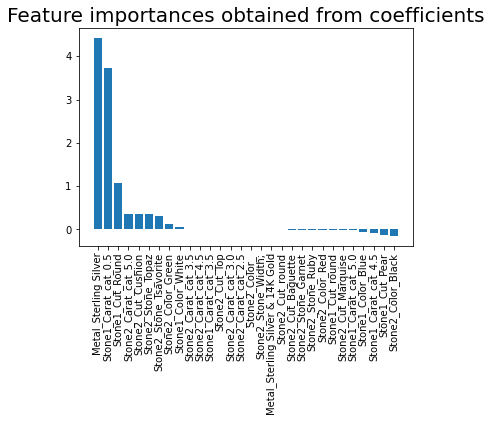

In [93]:
plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
#Predict the test data 
y_pred = logr.predict(X_test)
print("The Accuracy score of prediction: " ,accuracy_score(y_test, y_pred))

The Accuracy score of prediction:  0.33532934131736525


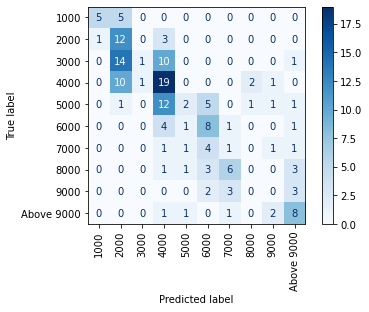

In [95]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

In [96]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.3216344113402937
Recall Score: 0.32110046957873045


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1000       0.83      0.50      0.62        10
        2000       0.29      0.75      0.41        16
        3000       0.50      0.04      0.07        26
        4000       0.37      0.58      0.45        33
        5000       0.33      0.09      0.14        23
        6000       0.36      0.53      0.43        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.00      0.00      0.00         8
  Above 9000       0.44      0.62      0.52        13

    accuracy                           0.34       167
   macro avg       0.32      0.32      0.27       167
weighted avg       0.35      0.34      0.28       167



In [98]:
y_pred[0:5]

array(['2000', '7000', 'Above 9000', '4000', '7000'], dtype=object)

In [99]:
y_test[0:5]

1316    3000
1210    6000
929     7000
1159    3000
1284    8000
Name: Price_Category, dtype: category
Categories (10, object): ['1000' < '2000' < '3000' < '4000' ... '7000' < '8000' < '9000' < 'Above 9000']

## Random Forest Model For Diamond Data Set

In [100]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),http://localhost:8888/notebooks/SpringBoard/DataScience_Capstone2/notebooks/Effy_EDA_Rings.ipynb#
#and then RandomForestClassifier with a random state of 47
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

In [101]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)

In [102]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.37984496, 0.31782946, 0.35658915])

In [103]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.351421188630491, 0.02558009027548234)

In [104]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params



{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [105]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [106]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  379, 483, 615,
                                                                  784, 1000],
                         'simpleimputer__str

In [107]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 483,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [108]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.40310078, 0.3255814 , 0.39534884])

In [109]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.37467700258397935, 0.034859786985095696)

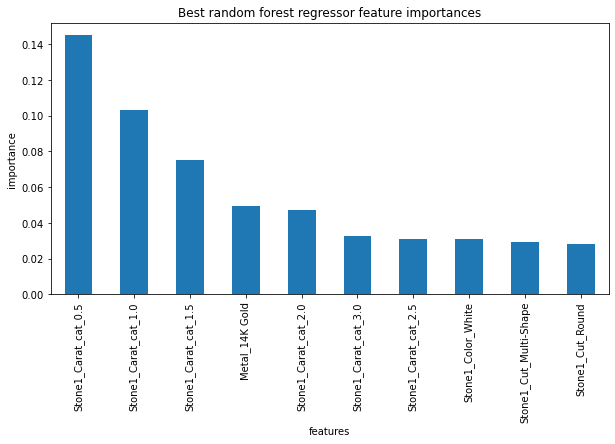

In [110]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [111]:
y_pred_rf = rf_grid_cv.predict(X_test)



In [112]:
print("The Accuracy score of Random Forest prediction: " ,accuracy_score(y_test, y_pred_rf))

The Accuracy score of Random Forest prediction:  0.3473053892215569


In [113]:
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test,y_pred_rf, average='macro')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.284585484391385
Recall Score: 0.35206682206682205


/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        1000       0.86      0.60      0.71        10
        2000       0.32      0.88      0.47        16
        3000       0.14      0.04      0.06        26
        4000       0.37      0.55      0.44        33
        5000       0.00      0.00      0.00        23
        6000       0.35      0.53      0.42        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.17      0.12      0.14         8
  Above 9000       0.56      0.69      0.62        13

    accuracy                           0.35       167
   macro avg       0.28      0.35      0.30       167
weighted avg       0.26      0.35      0.28       167



/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression For Other Stones

In [115]:
X1 = df_otherrings.drop(columns='Price_Category')
y1 = df_otherrings.Price_Category 


#Change category columns to One Hot Encoding
df_dummy_rings_O = pd.get_dummies(X1)
#df_dummy_rings_O.shape

#Split your data into testing and training datasets
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(df_dummy_rings_O, y1, test_size=0.3, 
                                                    random_state=47)


In [116]:
#from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_O, y_train_O)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Best: 0.394172 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.383484 (0.038382) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.388817 (0.028380) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.378108 (0.035713) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.394172 (0.040670) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.394172 (0.040670) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.388796 (0.051528) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.383462 (0.048237) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.383462 (0.048237) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.391527 (0.053905) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.370129 (0.047123) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.370129 (0.047123) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.370086 (0.034009) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.329763 (0.013228) with

In [117]:
logr = LogisticRegression(C=10, penalty= 'l2', solver = 'newton-cg')
logr.fit(X_train,y_train)
importances = pd.DataFrame(data={'Attribute':X_train.columns, 'Importance':logr.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=False)

In [118]:
from sklearn.model_selection import cross_val_score

score=logr.score(X_test, y_test)
print("Test Accuracy Score: ", score)
scores = cross_val_score(logr,X_train,y_train,cv=3,scoring='accuracy')
print("Cross Validation Accuracy Scores: ", scores)
print("Cross Validation min: {} , mean: {} , max :{}".format(scores.min(), scores.mean(), scores.max() ))

Test Accuracy Score:  0.3473053892215569
Cross Validation Accuracy Scores:  [0.37209302 0.31782946 0.39534884]
Cross Validation min: 0.3178294573643411 , mean: 0.3617571059431524 , max :0.3953488372093023


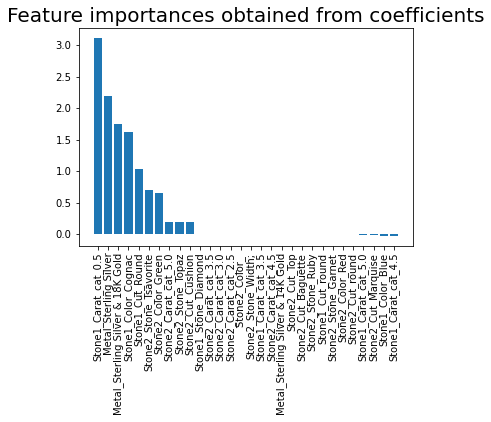

In [119]:
plt.bar(x=importances['Attribute'][:30], height=importances['Importance'][:30])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [120]:
y_pred = logr.predict(X_test)
print("The Accuracy score of prediction: " ,accuracy_score(y_test, y_pred))


The Accuracy score of prediction:  0.3473053892215569


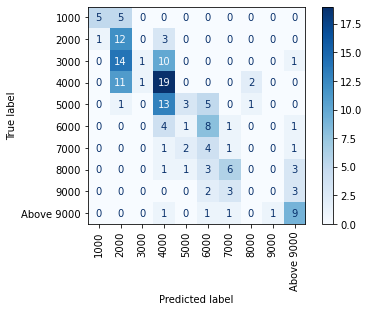

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr, X_test, y_test,cmap=plt.cm.Blues) 
plt.xticks(rotation=90)
plt.show()

In [122]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.33375185650210926
Recall Score: 0.3331406033579947


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1000       0.83      0.50      0.62        10
        2000       0.28      0.75      0.41        16
        3000       0.50      0.04      0.07        26
        4000       0.37      0.58      0.45        33
        5000       0.43      0.13      0.20        23
        6000       0.35      0.53      0.42        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.00      0.00      0.00         8
  Above 9000       0.50      0.69      0.58        13

    accuracy                           0.35       167
   macro avg       0.33      0.33      0.28       167
weighted avg       0.36      0.35      0.29       167



In [124]:
y_pred[0:5]

array(['2000', '7000', 'Above 9000', '4000', '7000'], dtype=object)

In [125]:
y_test[0:5]

1316    3000
1210    6000
929     7000
1159    3000
1284    8000
Name: Price_Category, dtype: category
Categories (10, object): ['1000' < '2000' < '3000' < '4000' ... '7000' < '8000' < '9000' < 'Above 9000']

## Random Forest Model For Other Gemstones

In [126]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),http://localhost:8888/notebooks/SpringBoard/DataScience_Capstone2/notebooks/Effy_EDA_Rings.ipynb#
#and then RandomForestClassifier with a random state of 47
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

In [127]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)
rf_cv_scores = rf_default_cv_results['test_score']
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.351421188630491, 0.02558009027548234)

In [128]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [129]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)


In [130]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  379, 483, 615,
                                                                  784, 1000],
                         'simpleimputer__str

In [131]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 483,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [132]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=3)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.40310078, 0.3255814 , 0.39534884])

In [133]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.37467700258397935, 0.034859786985095696)

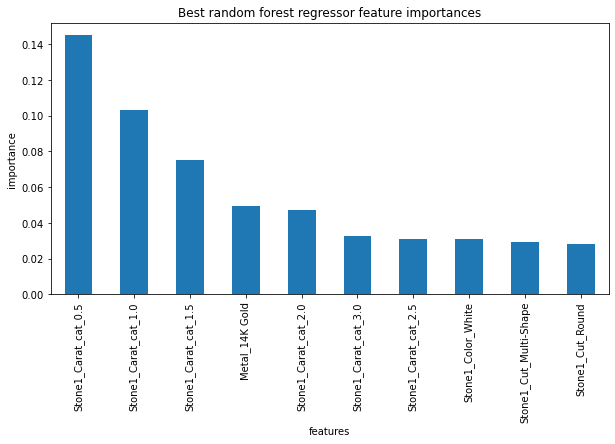

In [134]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestclassifier` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.head(10).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');


In [135]:

y_pred_rf = rf_grid_cv.predict(X_test)

In [136]:
print("The Accuracy score of Random Forest prediction: " ,accuracy_score(y_test, y_pred_rf))


The Accuracy score of Random Forest prediction:  0.3473053892215569


In [137]:
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test,y_pred_rf, average='macro')

print('Precision Score: ', precision)
print('Recall Score:', recall)

Precision Score:  0.284585484391385
Recall Score: 0.35206682206682205


/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        1000       0.86      0.60      0.71        10
        2000       0.32      0.88      0.47        16
        3000       0.14      0.04      0.06        26
        4000       0.37      0.55      0.44        33
        5000       0.00      0.00      0.00        23
        6000       0.35      0.53      0.42        15
        7000       0.08      0.11      0.10         9
        8000       0.00      0.00      0.00        14
        9000       0.17      0.12      0.14         8
  Above 9000       0.56      0.69      0.62        13

    accuracy                           0.35       167
   macro avg       0.28      0.35      0.30       167
weighted avg       0.26      0.35      0.28       167



/Users/rupalgandhre/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
